 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [12]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

In [69]:
## Whale Returns

# Read the Whale Portfolio daily returns and clean the data.
whale_returns_path = Path("./Resources/whale_returns.csv")
algo_returns_path = Path("./Resources/algo_returns.csv")
sp_tsx_history_path = Path("./Resources/sp_tsx_history.csv")

whale_returns_df = pd.read_csv(whale_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns_df = pd.read_csv(algo_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp_tsx_history_df = pd.read_csv(sp_tsx_history_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Visually check if tehre is any anomaly 
whale_returns_df.dtypes
algo_returns_df.dtypes
sp_tsx_history_df.dtypes

# Count nulls
whale_returns_df.isna().sum()
algo_returns_df.isna().sum()
sp_tsx_history_df.isna().sum()

# Drop nulls
whale_returns_df.dropna(inplace=True)
algo_returns_df.dropna(inplace=True)
sp_tsx_history_df.dropna(inplace=True)

# Deduplicating
# Checking if there is any
whale_returns_df.duplicated().sum()
algo_returns_df.duplicated().sum()
sp_tsx_history_df.duplicated().sum()

# Seeing the duplicated rows
whale_returns_df.loc[whale_returns_df.duplicated()]
algo_returns_df.loc[algo_returns_df.duplicated()]
whale_returns_df.loc[whale_returns_df.duplicated()]

# Removing duplicates
whale_returns_df = whale_returns_df.drop_duplicates().copy()
algo_returns_df = algo_returns_df.drop_duplicates().copy()
sp_tsx_history_df = sp_tsx_history_df.drop_duplicates().copy()

# Checking if duplicates removed
whale_returns_df.duplicated().sum()
algo_returns_df.duplicated().sum()
sp_tsx_history_df.duplicated().sum()

# Removing "$" and "," form the data and convert the field to the type float64
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace("$", "", regex=False)
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].str.replace(",", "", regex=False)
sp_tsx_history_df["Close"] = sp_tsx_history_df["Close"].astype('float')
sp_tsx_history_df.head()
sp_tsx_history_df.dtypes

# Setting "Date" as indices (if it's not already)
# whale_returns_df.set_index(whale_returns_df["Date"], inplace=True)
# algo_returns_df.set_index(algo_returns_df["Date"], inplace=True)
# sp_tsx_history_df.set_index(sp_tsx_history_df["Date"], inplace=True)

# Rename `Close` Column to be specific to this portfolio.
sp_tsx_history_df.rename(columns = {'Close' : 'SP_TSX_Close'}, inplace = True)

# Combining all DataFrames into a single DataFrame
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp_tsx_history_df], axis="columns", join="inner")

# Sorting by Date
combined_df.sort_index(inplace=True, ascending=True)
combined_df.head()
# combined_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX_Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,15133.85
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,15082.84
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,15103.11
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,14952.50
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,14854.49


Series([], Name: Algo 1, dtype: float64)

In [ ]:
# Reading whale returns


In [ ]:
# Count nulls


In [ ]:
# Drop nulls


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [ ]:
# Reading algorithmic returns


In [ ]:
# Count nulls


In [ ]:
# Drop nulls


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [ ]:
# Reading S&P TSX 60 Closing Prices


In [ ]:
# Check Data Types


In [ ]:
# Fix Data Types


In [ ]:
# Calculate Daily Returns


In [ ]:
# Drop nulls


In [ ]:
# Rename `Close` Column to be specific to this portfolio.


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [ ]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

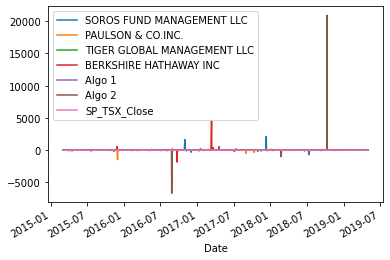

In [80]:
# Plot daily returns of all portfolios

combined_df_returns = combined_df.pct_change()
combined_df_returns.head()
combined_df_returns.plot()

#### Calculate and Plot cumulative returns.

In [79]:
# Calculate cumulative returns of all portfolios
cumulative_combined_df_returns = (1 + combined_df_returns).cumprod() - 1
cumulative_combined_df_returns.head()

# Plot cumulative returns
cumulative_combined_df_returns.plot()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX_Close
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.003371
2015-03-05,-4.173432,-1.818399,-5.751772,-2.024002,-0.508246,-5.553173,-0.002031
2015-03-06,5.246788,-0.282397,16.115278,0.994020,1.552226,11.070068,-0.011983
2015-03-09,-1.460116,-1.848387,-12.790828,-0.748434,1.804686,-2.372559,-0.018459


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:xlabel='Date'>

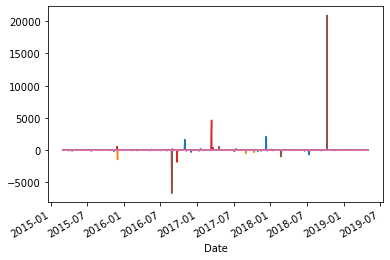

In [85]:
# Box plot to visually show risk
combined_df_returns["SOROS FUND MANAGEMENT LLC"].plot()
combined_df_returns["PAULSON & CO.INC. "].plot()
combined_df_returns["TIGER GLOBAL MANAGEMENT LLC"].plot()
combined_df_returns["BERKSHIRE HATHAWAY INC"].plot()
combined_df_returns["Algo 1"].plot()
combined_df_returns["Algo 2"].plot()
combined_df_returns["SP_TSX_Close"].plot()

### Calculate Standard Deviations

In [101]:
# Calculate the daily standard deviations of all portfolios
combined_df_returns_volatility = combined_df_returns.std()
combined_df_returns_volatility[0:7]

SOROS FUND MANAGEMENT LLC             NaN
PAULSON & CO.INC.                     NaN
TIGER GLOBAL MANAGEMENT LLC           NaN
BERKSHIRE HATHAWAY INC                NaN
Algo 1                          16.019064
Algo 2                         697.771667
SP_TSX_Close                     0.007077
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [105]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_df_returns_volatility = combined_df_returns["SP_TSX_Close"].std()
sp_tsx_df_returns_volatility

# Determine which portfolios are riskier than the S&P TSX 60
combined_df_returns_volatility = combined_df_returns_volatility.sort_values()
combined_df_returns_volatility.loc[combined_df_returns_volatility > sp_tsx_df_returns_volatility]

Algo 1     16.019064
Algo 2    697.771667
dtype: float64

### Calculate the Annualized Standard Deviation

In [106]:
# Calculate the annualized standard deviation (252 trading days)
combined_df_returns_volatility_annualized = combined_df_returns.std() # * np.sqrt(252)
combined_df_returns_volatility_annualized[0:7]

SOROS FUND MANAGEMENT LLC             NaN
PAULSON & CO.INC.                     NaN
TIGER GLOBAL MANAGEMENT LLC           NaN
BERKSHIRE HATHAWAY INC                NaN
Algo 1                          16.019064
Algo 2                         697.771667
SP_TSX_Close                     0.007077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [ ]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate the correlation

# Display de correlation matrix


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [ ]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P TSX

# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!